In [55]:
from google_images_download import google_images_download
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

In [2]:
churches = pd.read_csv("churches.csv")
churches

,name,lat,lon,town
0,Chiesetta San Valentino,45.638505,11.397729,Malo
1,Chiesetta di Restele,45.878132,11.304591,Longhi
2,Maria Ausiliatrice,45.887916,11.044709,Rovereto
3,Chiesetta del Carmine,45.624803,11.394899,Cereda-Cozza Cornedo
4,Chiesa Gentilata,45.661233,11.374849,Monte di Malo
...,...,...,...,...
1562,Chiesa di San Zenone ed Eurosia,45.597424,10.136609,Ronco
1563,Chiesa di Santa Maria Assunta,45.527741,10.183582,Roncadelle
1564,Chiesa e convento di San Pancrazio,45.401521,11.565733,Ponte di Barbarano
1565,Chiesa di Sant'Andrea,45.951494,10.270595,Malegno


In [4]:
dropdown_town = widgets.Dropdown(options=churches["town"].unique())

output_town = widgets.Output()

def dropdown_town_eventhandler(change):
    output_town.clear_output()
    with output_town:
        display(churches[churches["town"] == change.new])
        
dropdown_town.observe(dropdown_town_eventhandler, names="value")

display(dropdown_town, output_town)

Dropdown(options=('Malo', 'Longhi', 'Rovereto', 'Cereda-Cozza Cornedo', 'Monte di Malo', 'Arcole', 'Bassano de…

Output()

In [90]:
def get_images(search_query):
    response = google_images_download.googleimagesdownload()
    paths = response.download({"keywords": "{}".format(search_query),
                               "limit": 6})
    return [img.imread(p) for p in paths[0][search_query]]

In [78]:
def plot_images(images):    
    plt.figure(figsize=(12,12))
    
    for (i,image) in enumerate(images):
        plt.subplot(2, 3, i+1)
        plt.imshow(image)
        plt.xticks([]), plt.yticks([])
    
    plt.show()

In [89]:
search_queries = churches["town"] + " " + churches["name"]

dropdown_church = widgets.Dropdown(options=list(zip(search_queries,churches.index)))
output_data = widgets.Output()
output_images = widgets.Output()

dashboard = widgets.VBox([dropdown_church, output_images, output_data])

def select_church(change):
    church = churches.loc[dropdown_church.value]
    output_data.clear_output()
    with output_data:
        display(church)
    output_images.clear_output()
    with output_data:
        images = get_images(search_queries[dropdown_church.value])
    with output_images:
        display(plot_images(images))
        
dropdown_church.observe(select_church)

display(dashboard)

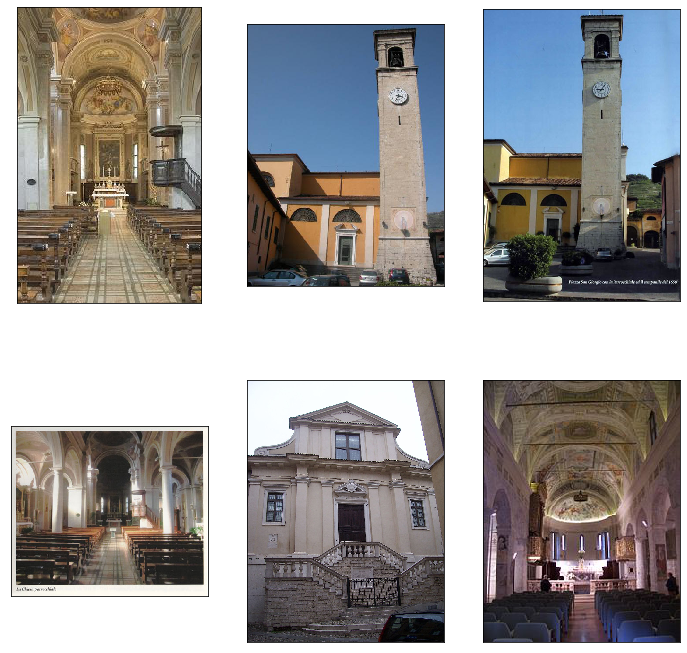

In [45]:
image_1 = img.imread("downloads/Cellatica Chiesa di San Giorgio/1.medium_2DLch01b.jpg")
image_2 = img.imread("downloads/Cellatica Chiesa di San Giorgio/2.594_bs290-00594_d01.jpg")
image_3 = img.imread("downloads/Cellatica Chiesa di San Giorgio/3.chiesa.jpg")
image_4 = img.imread("downloads/Cellatica Chiesa di San Giorgio/4.chiesa.jpg")
image_5 = img.imread("downloads/Cellatica Chiesa di San Giorgio/5.1200px-San_giorgio_%28brescia%29_facciata.jpg")
image_6 = img.imread("downloads/Cellatica Chiesa di San Giorgio/6.220px-San_giorgio_%28brescia%29_interno.jpg")

reference_image = img.imread("the_church.png")

plt.figure(figsize=(12,12))

plt.subplot(2, 3, 1)
plt.imshow(image_1)
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(image_2)
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(image_3)
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(image_4)
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(image_5)
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6)
plt.imshow(image_6)
plt.xticks([]), plt.yticks([])

plt.show()